In [1]:
import os
import sys
sys.path.append('..')
import torch

import pretorched.visualizers as vutils
from pretorched.models import utils as mutils
import core
from data import VideoFolder

%load_ext autoreload
%autoreload 2

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
data_root = os.environ.get('DATA_ROOT', '')
datadir = os.path.join(data_root, 'DeepfakeDetection', 'facenet_videos', 'dfdc_train_part_0','aaqaifqrwn.mp4')
dataset = VideoFolder(datadir, step=10)
print(dataset)

Dataset VideoFolder
  Root dir: /data/datasets/DeepfakeDetection/facenet_videos/dfdc_train_part_0/aaqaifqrwn.mp4
  Number of datapoints: 2
  Transforms (if any): VideoToTensor(rescale=False, ordering='CTHW')



In [4]:
model = core.get_model('ManipulatorDetector')
ckpt_file = 'weights/ManipulatorDetector_resnet18_all_seg_count-16_init-imagenet-ortho_optim-Ranger_lr-0.001_sched-CosineAnnealingLR_bs-33_best.pth.tar'
ckpt = torch.load(ckpt_file, map_location='cpu')
model.load_state_dict(mutils.remove_prefix(ckpt['state_dict']))
model = model.to(device)

In [15]:
name, frames, target = dataset[0]
frames = frames.unsqueeze(0)

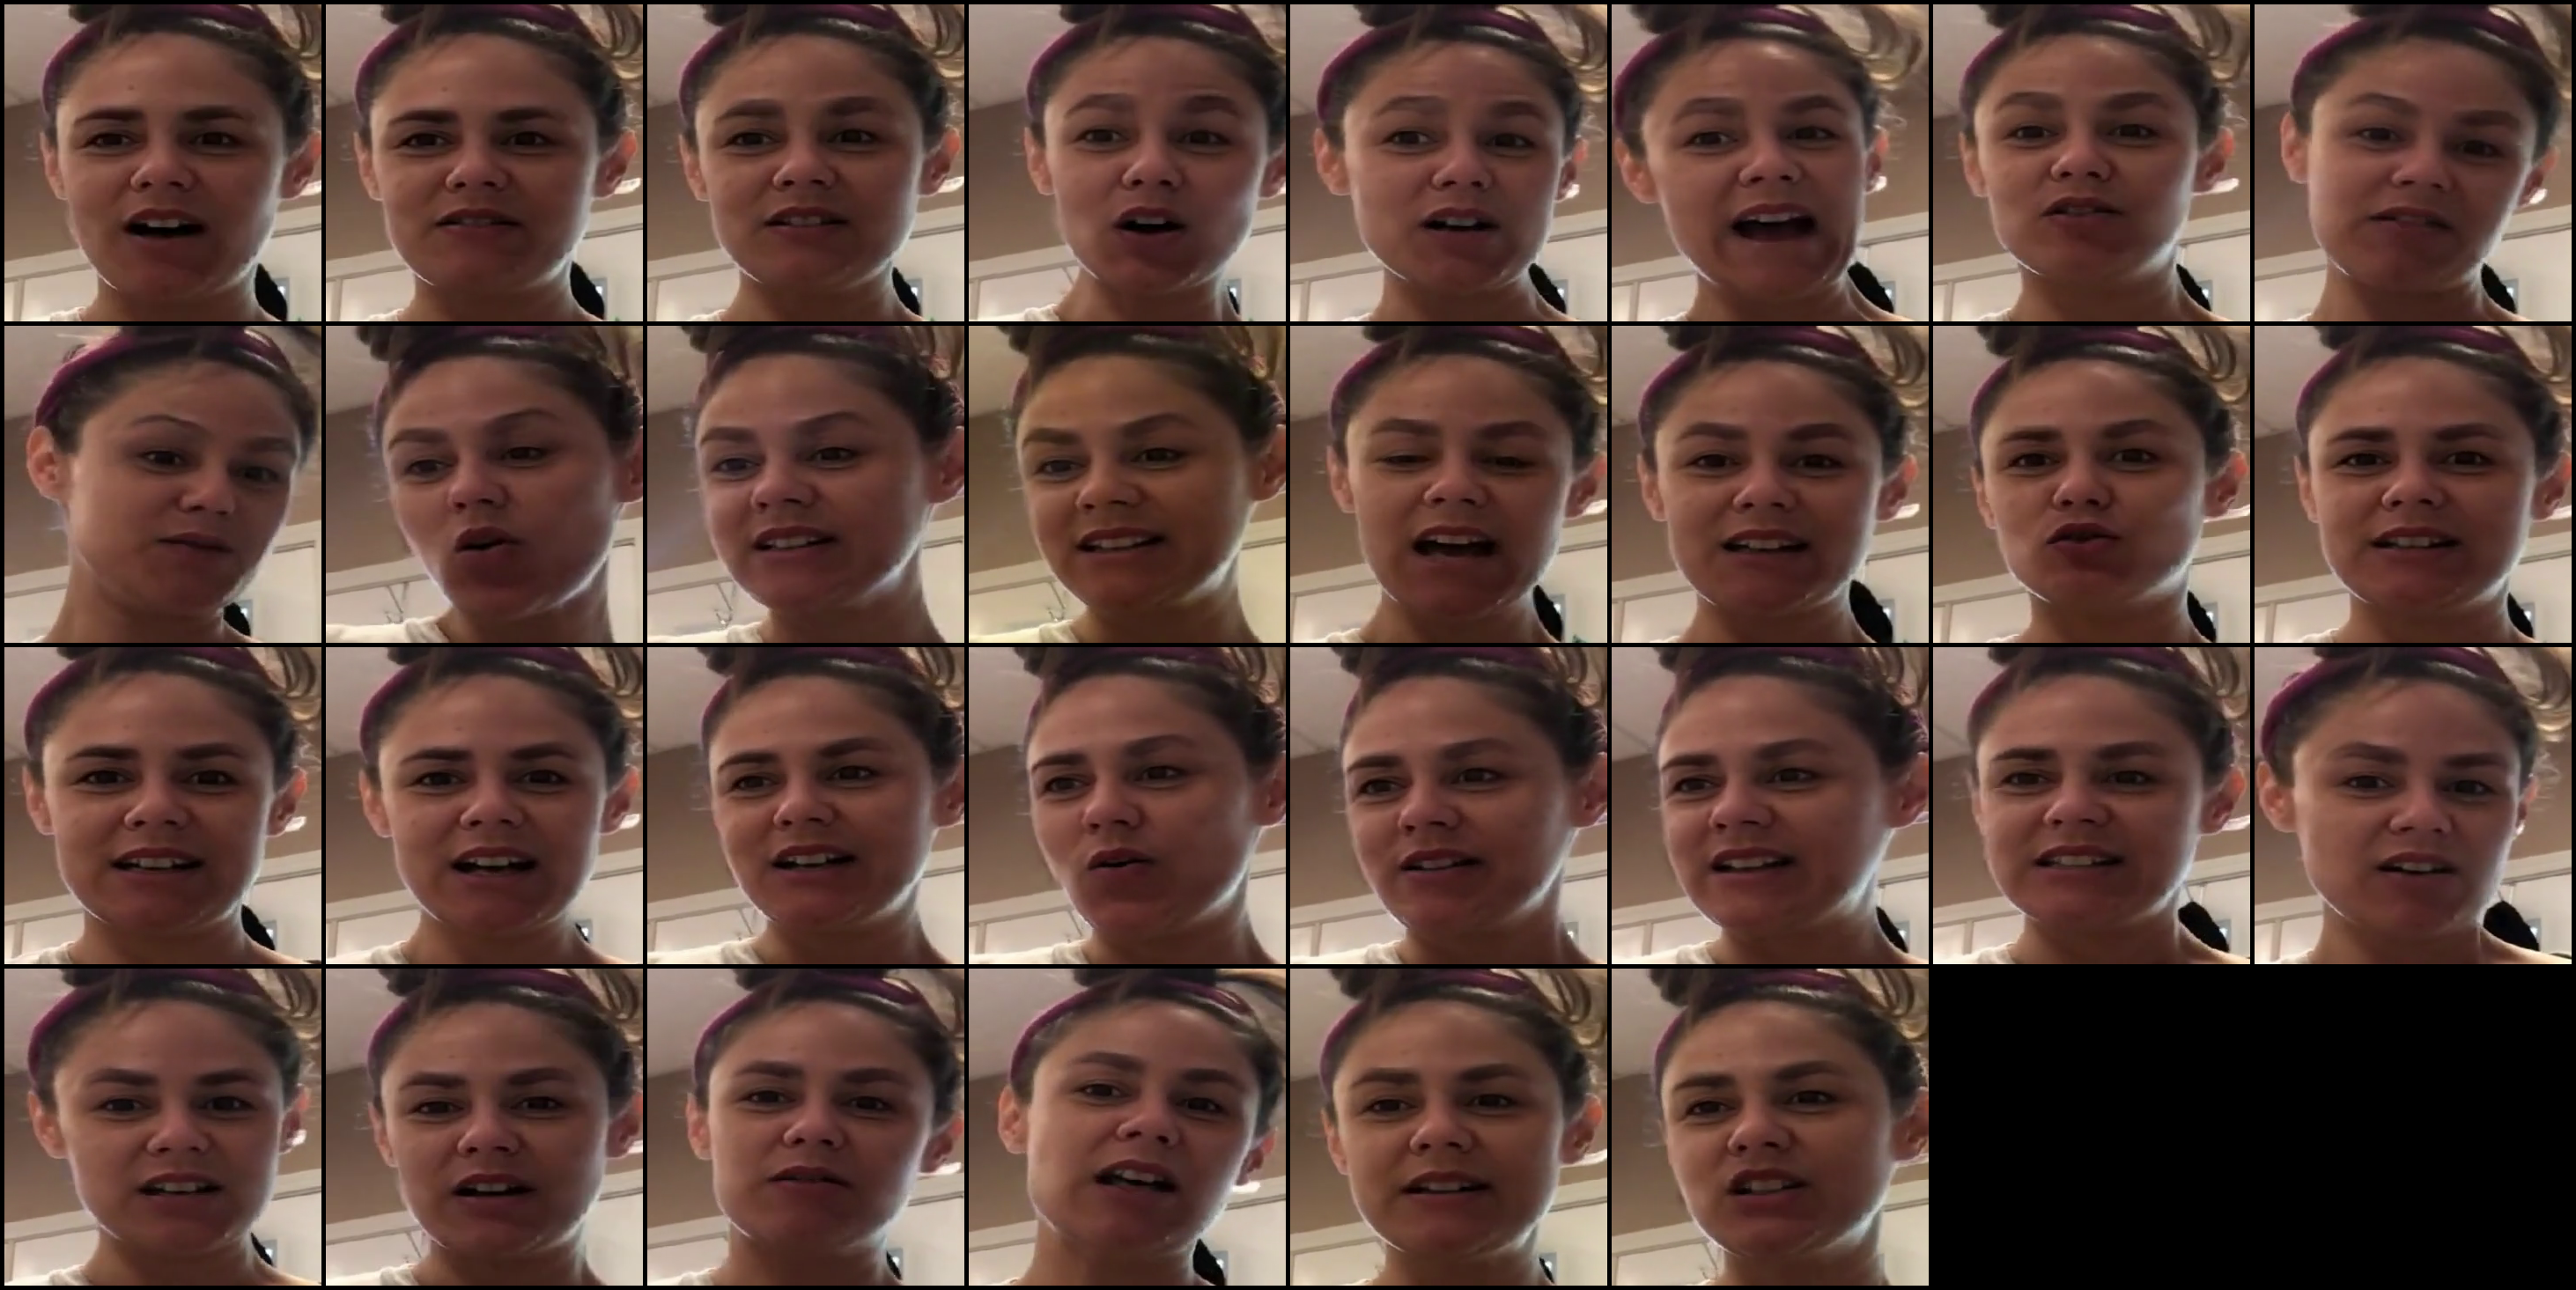

In [16]:
vutils.visualize_samples(frames.squeeze(0).transpose(0, 1))

In [17]:
with torch.no_grad():
    frames = frames.to(device)
    out = model.manipulate(frames)

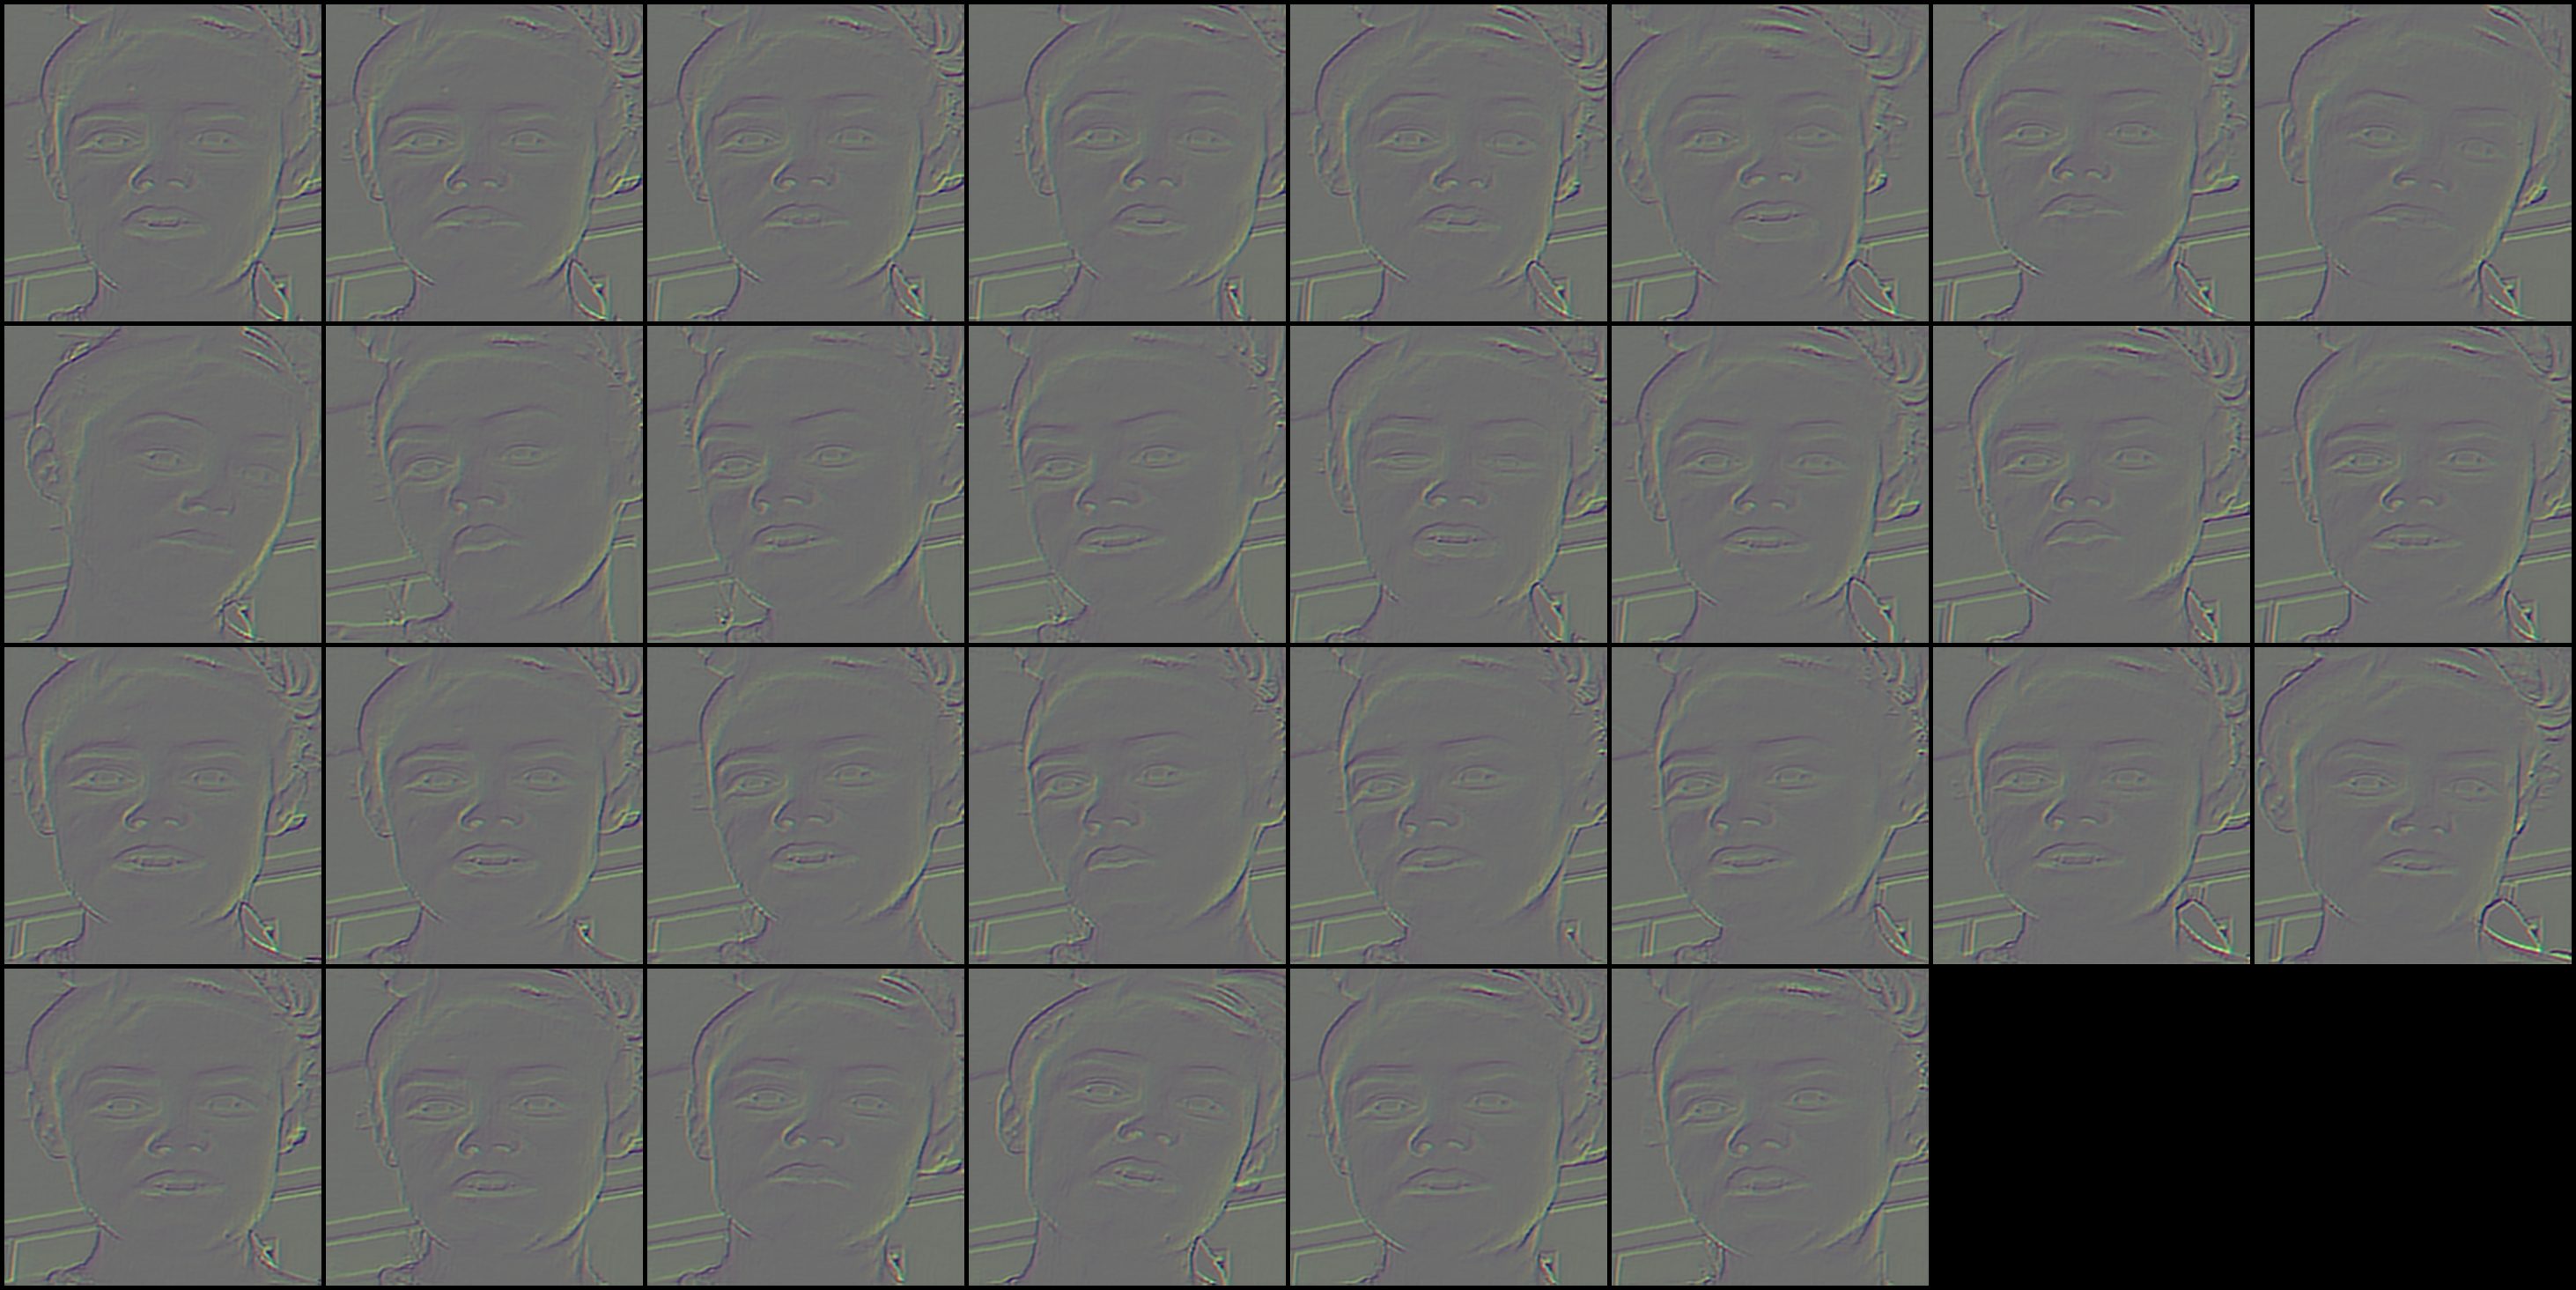

In [18]:
vutils.visualize_samples(out.squeeze(0).transpose(0, 1))